## Import libraries

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## import dataset

In [81]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    float64
 3   Name         888 non-null    object 
 4   Sex          888 non-null    int64  
 5   Age          715 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        887 non-null    float64
 8   Ticket       887 non-null    object 
 9   Fare         886 non-null    float64
 10  Embarked     886 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 76.4+ KB


# Outliers

In [82]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,888.000000,888.000000,888.00000,888.000000,715.000000,888.000000,887.000000,886.000000,886.000000
mean,447.238739,0.382883,2.30518,1.351351,36.006993,0.602477,0.370913,32.024786,1.363431
std,257.528189,0.486364,0.84697,0.477662,165.601302,2.579661,0.769751,49.947084,0.636884
min,1.000000,0.000000,-2.00000,1.000000,-12.000000,0.000000,0.000000,-90.000000,1.000000
25%,224.750000,0.000000,2.00000,1.000000,20.000000,0.000000,0.000000,7.900000,1.000000
50%,446.500000,0.000000,3.00000,1.000000,28.000000,0.000000,0.000000,14.450000,1.000000
75%,669.250000,1.000000,3.00000,2.000000,38.000000,1.000000,0.000000,30.700000,2.000000
max,1000.000000,1.000000,3.00000,2.000000,4435.000000,70.000000,5.000000,512.330000,3.000000


### Survived

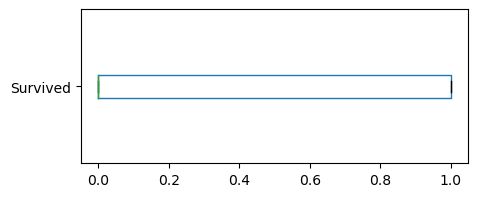

In [83]:
df_titanic.boxplot(column=['Survived'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [84]:
LB = df_titanic['Survived'].quantile(0.01)
UB = df_titanic['Survived'].quantile(0.99)

print('Lower Bound:',LB)
print('Upper Bound:',UB)

Lower Bound: 0.0
Upper Bound: 1.0


In [85]:
df_titanic[(df_titanic['Survived'] < LB) | (df_titanic['Survived'] > UB)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


### Pclass

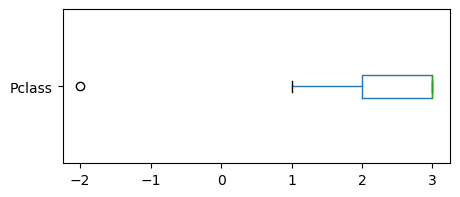

In [90]:
df_titanic.boxplot(column=['Pclass'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [91]:
LB = df_titanic['Pclass'].quantile(0.01)
UB = df_titanic['Pclass'].quantile(0.99)

print('Lower Bound:',LB)
print('Upper Bound:',UB)

Lower Bound: 1.0
Upper Bound: 3.0


In [92]:
df_titanic[(df_titanic['Pclass'] < LB) | (df_titanic['Pclass'] > UB)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
863,868,0,-2.0,"Roebling, Mr. Washington Augustus II",1,31.0,0,0.0,PC 17590,50.5,1.0


In [93]:
df_titanic['Pclass'][(df_titanic['Pclass'] < LB) | (df_titanic['Pclass'] > UB)] = np.median(df_titanic['Pclass'])



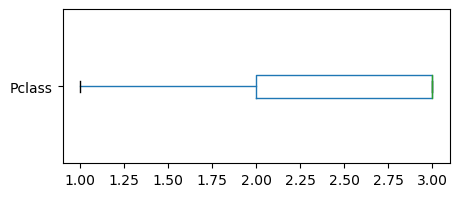

In [94]:
df_titanic.boxplot(column=['Pclass'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### Age

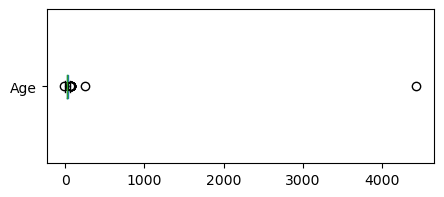

In [95]:
df_titanic.boxplot(column=['Age'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [96]:
LB = df_titanic['Age'].quantile(0.01)
UB = df_titanic['Age'].quantile(0.99)

print('Lower Bound:',LB)
print('Upper Bound:',UB)

Lower Bound: 1.0
Upper Bound: 70.0


In [97]:
df_titanic[(df_titanic['Age'] < LB) | (df_titanic['Age'] > UB)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
94,97,0,1.0,"Goldschmidt, Mr. George B",1,71.0,0,0.0,PC 17754,34.65,2.0
221,224,0,3.0,"Nenkoff, Mr. Christo",1,4435.0,0,0.0,349234,7.90,1.0
491,494,0,1.0,"Artagaveytia, Mr. Ramon",1,71.0,0,0.0,PC 17609,49.50,2.0
505,508,1,1.0,"Bradley, Mr. George (""George Arthur Brayton"")",1,-3.0,0,0.0,111427,26.55,1.0
519,523,0,3.0,"Lahoud, Mr. Sarkis",1,-12.0,0,0.0,2624,7.22,2.0
627,631,1,1.0,"Barkworth, Mr. Algernon Henry Wilson",1,80.0,0,0.0,27042,30.00,1.0
663,667,0,2.0,"Butler, Mr. Reginald Fenton",1,250.0,0,0.0,234686,13.00,1.0
799,804,1,3.0,"Thomas, Master. Assad Alexander",1,0.0,0,1.0,2625,8.52,2.0
847,852,0,3.0,"Svensson, Mr. Johan",1,74.0,0,0.0,347060,7.78,1.0


In [98]:
df_titanic['Age'][(df_titanic['Age'] < LB) | (df_titanic['Age'] > UB)] = np.median(df_titanic['Age'])

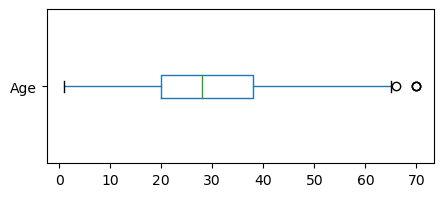

In [99]:
df_titanic.boxplot(column=['Age'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### SibSp

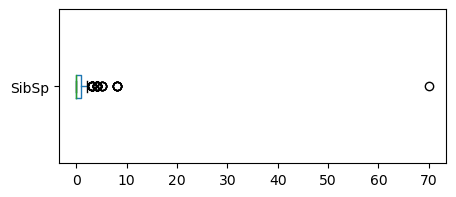

In [100]:
df_titanic.boxplot(column=['SibSp'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [101]:
LB = df_titanic['SibSp'].quantile(0.01)
UB = df_titanic['SibSp'].quantile(0.99)

print('Lower Bound:',LB)
print('Upper Bound:',UB)

Lower Bound: 0.0
Upper Bound: 5.0


In [102]:
df_titanic[(df_titanic['SibSp'] < LB) | (df_titanic['SibSp'] > UB)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
157,160,0,3.0,"Sage, Master. Thomas Henry",1,NaN,8,2.0,CA. 2343,69.55,1.0
178,181,0,3.0,"Sage, Miss. Constance Gladys",2,NaN,8,2.0,CA. 2343,69.55,1.0
199,202,0,3.0,"Sage, Mr. Frederick",1,NaN,8,2.0,CA. 2343,69.55,1.0
322,325,0,3.0,"Sage, Mr. George John Jr",1,NaN,8,2.0,CA. 2343,69.55,1.0
460,463,0,1.0,"Gee, Mr. Arthur H",1,47.0,70,0.0,111320,38.50,1.0
788,793,0,3.0,"Sage, Miss. Stella Anna",2,NaN,8,2.0,CA. 2343,69.55,1.0
842,847,0,3.0,"Sage, Mr. Douglas Bullen",1,NaN,8,2.0,CA. 2343,69.55,1.0
859,864,0,3.0,"Sage, Miss. Dorothy Edith ""Dolly""",2,NaN,8,2.0,CA. 2343,69.55,1.0


In [103]:
df_titanic['SibSp'][(df_titanic['SibSp'] < LB) | (df_titanic['SibSp'] > UB)] = np.median(df_titanic['SibSp'])


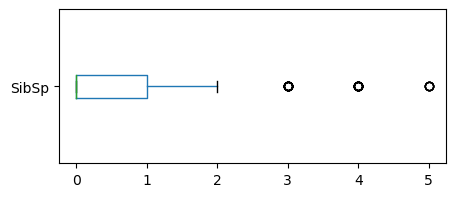

In [104]:
df_titanic.boxplot(column=['SibSp'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### Parch

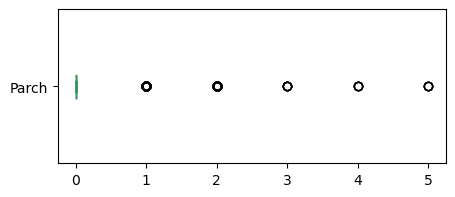

In [106]:
df_titanic.boxplot(column=['Parch'],fontsize=10,grid=False,figsize=(5,2), vert=False)
plt.show()

In [107]:
LB = df_titanic['Parch'].quantile(0.01)
UB = df_titanic['Parch'].quantile(0.99)

print('Lower Bound:',LB)
print('Upper Bound:',UB)

Lower Bound: 0.0
Upper Bound: 3.0


In [108]:
df_titanic[(df_titanic['Parch'] < LB) | (df_titanic['Parch'] > UB)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
23,26,1,3.0,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",2,38.0,1,5.0,347077,31.39,1.0
165,168,0,3.0,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",2,45.0,1,4.0,347088,27.90,1.0
358,361,0,3.0,"Skoog, Mr. Wilhelm",1,40.0,1,4.0,347088,27.90,1.0
436,439,0,1.0,"Fortune, Mr. Mark",1,64.0,1,4.0,19950,263.00,1.0
564,568,0,3.0,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",2,29.0,0,4.0,349909,21.08,1.0
607,611,0,3.0,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",2,39.0,1,5.0,347082,31.28,1.0
635,639,0,3.0,"Panula, Mrs. Juha (Maria Emilia Ojala)",2,41.0,0,5.0,3101295,39.69,1.0
881,886,0,3.0,"Rice, Mrs. William (Margaret Norton)",2,39.0,0,5.0,382652,29.12,3.0


In [109]:
df_titanic['Parch'][(df_titanic['Parch'] < LB) | (df_titanic['Parch'] > UB)] = np.median(df_titanic['Parch'])

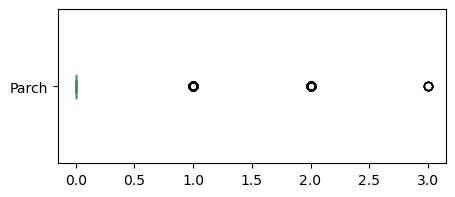

In [110]:
df_titanic.boxplot(column=['Parch'],fontsize=10,grid=False,figsize=(5,2), vert=False)
plt.show()

### Fare

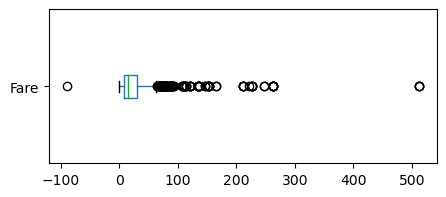

In [111]:
df_titanic.boxplot(column=['Fare'],fontsize=10,grid=False,figsize=(5,2), vert=False)
plt.show()

In [112]:
LB = df_titanic['Fare'].quantile(0.01)
UB = df_titanic['Fare'].quantile(0.99)

print('Lower Bound:',LB)
print('Upper Bound:',UB)

Lower Bound: 0.0
Upper Bound: 249.74899999999968


In [113]:
df_titanic[(df_titanic['Fare'] < LB) | (df_titanic['Fare'] > UB)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
25,28,0,1.0,"Fortune, Mr. Charles Alexander",1,19.0,3,2.0,19950,263.00,1.0
86,89,1,1.0,"Fortune, Miss. Mabel Helen",2,23.0,3,2.0,19950,263.00,1.0
243,246,0,1.0,"Minahan, Dr. William Edward",1,44.0,2,0.0,19928,-90.00,3.0
256,259,1,1.0,"Ward, Miss. Anna",2,35.0,0,0.0,PC 17755,512.33,2.0
309,312,1,1.0,"Ryerson, Miss. Emily Borie",2,18.0,2,2.0,PC 17608,262.38,2.0
339,342,1,1.0,"Fortune, Miss. Alice Elizabeth",2,24.0,3,2.0,19950,263.00,1.0
436,439,0,1.0,"Fortune, Mr. Mark",1,64.0,1,NaN,19950,263.00,1.0
675,680,1,1.0,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1.0,PC 17755,512.33,2.0
733,738,1,1.0,"Lesurer, Mr. Gustave J",1,35.0,0,0.0,PC 17755,512.33,2.0
738,743,1,1.0,"Ryerson, Miss. Susan Parker ""Suzette""",2,21.0,2,2.0,PC 17608,262.38,2.0


In [114]:
df_titanic['Fare'][(df_titanic['Fare'] < LB) | (df_titanic['Fare'] > UB)] = np.median(df_titanic['Fare'])

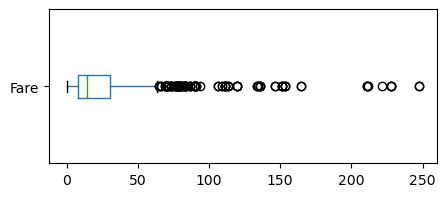

In [115]:
df_titanic.Fare = abs(df_titanic.Fare)
df_titanic.boxplot(column=['Fare'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [116]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,888.000000,888.000000,888.000000,888.000000,706.000000,888.000000,879.000000,876.000000,886.000000
mean,447.238739,0.382883,2.310811,1.351351,29.432011,0.460586,0.333333,28.938596,1.363431
std,257.528189,0.486364,0.834850,0.477662,14.201350,0.881106,0.662477,36.613523,0.636884
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,224.750000,0.000000,2.000000,1.000000,20.000000,0.000000,0.000000,7.900000,1.000000
50%,446.500000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.400000,1.000000
75%,669.250000,1.000000,3.000000,2.000000,38.000000,1.000000,0.000000,30.177500,2.000000
max,1000.000000,1.000000,3.000000,2.000000,70.000000,5.000000,3.000000,247.520000,3.000000


In [117]:
df_titanic = df_titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [118]:
# saving the dataframe
df_titanic.to_csv('titanic5_percentile_median.csv', index=False)